In [1]:
import pandas as pd
import os

In [2]:
def read_files_in_directory(directory):

    file_paths = []
    for root, _, files in os.walk(directory):

        for file in files:
            if file[-3:] != "txt":
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths
directory_path = "data\\geneRead"
files = read_files_in_directory(directory_path)

In [3]:
HS = ["ALDOA", "ANGPTL4" , "ANLN" , "BNC1" , 'C20orf20' , 'CA9' , 
      'CDKN3' , 'COL4A6' , 'DCBLD1' , 'ENO1' , 'FAM83B', 'FOSL1' , 
      'GNAI1' , 'HIG2' , 'KCTD11' , 'KRT17' , 'LDHA' , 'MPRS17' , 
      "P4HA1" 	, 'PGAM1' 	, 'PGK1' 	, 'SDC1' 	, 'SLC16A1' , 
      'SLC2A1', 'TPI1' 	, 'VEGFA']

IS = ["HLA-DQA1", "HLA-DQA2", "HLA-DRB5", "CTLA4", "PDCD1LG2", 
      'ICAM1', 'CD274', 'STAT1', 'IRF1', 'IFNG', 'GNLY', "TBX21", 
      "CCL5", "LAG3", "CD247", 'ICOS', 'IL18RAP', "CXCL9", "CXCL10", 
      "HLA-DPB1", 'HLA-DPA1', "HLA-DMB", 'HLA-DRA', 'HLA-DMA', 'CD80', 
      "HLA-DOA", "CD4"]
hypooxia_immue_signature = HS + IS

In [4]:
def extract_hypooxia_immue_signature(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    filtered_df = df[df['gene_name'].isin(hypooxia_immue_signature)]
    gene_in_data = set(df['gene_name'])
    not_detected = set(hypooxia_immue_signature) - gene_in_data
    return filtered_df, not_detected

In [ ]:
for file in files:
    df, not_detected = extract_hypooxia_immue_signature(file)
    print(not_detected)

| case_ID | gene_1 | gene_2 | .... |
| case_ID | protein_1 | gene_2 | .... |

1. normalized by dividing the expression values by the sum of expression values of the analyzed genes for each sample
2. log2 transformed
3. z-scores were calculated
4. using Spearman distance and Ward criterion Cluster analyses
5. plot heatmaps using the z-score values matrix for color intensities.
6. Cox regression analyses using Kaplan–Meier curves to compare the three highest hierarchical sample groups on each heatmap
7. Cox regression multivariate was used to calculate the combined effect of HPV status and heatmap groups (Survival package in R)


https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/
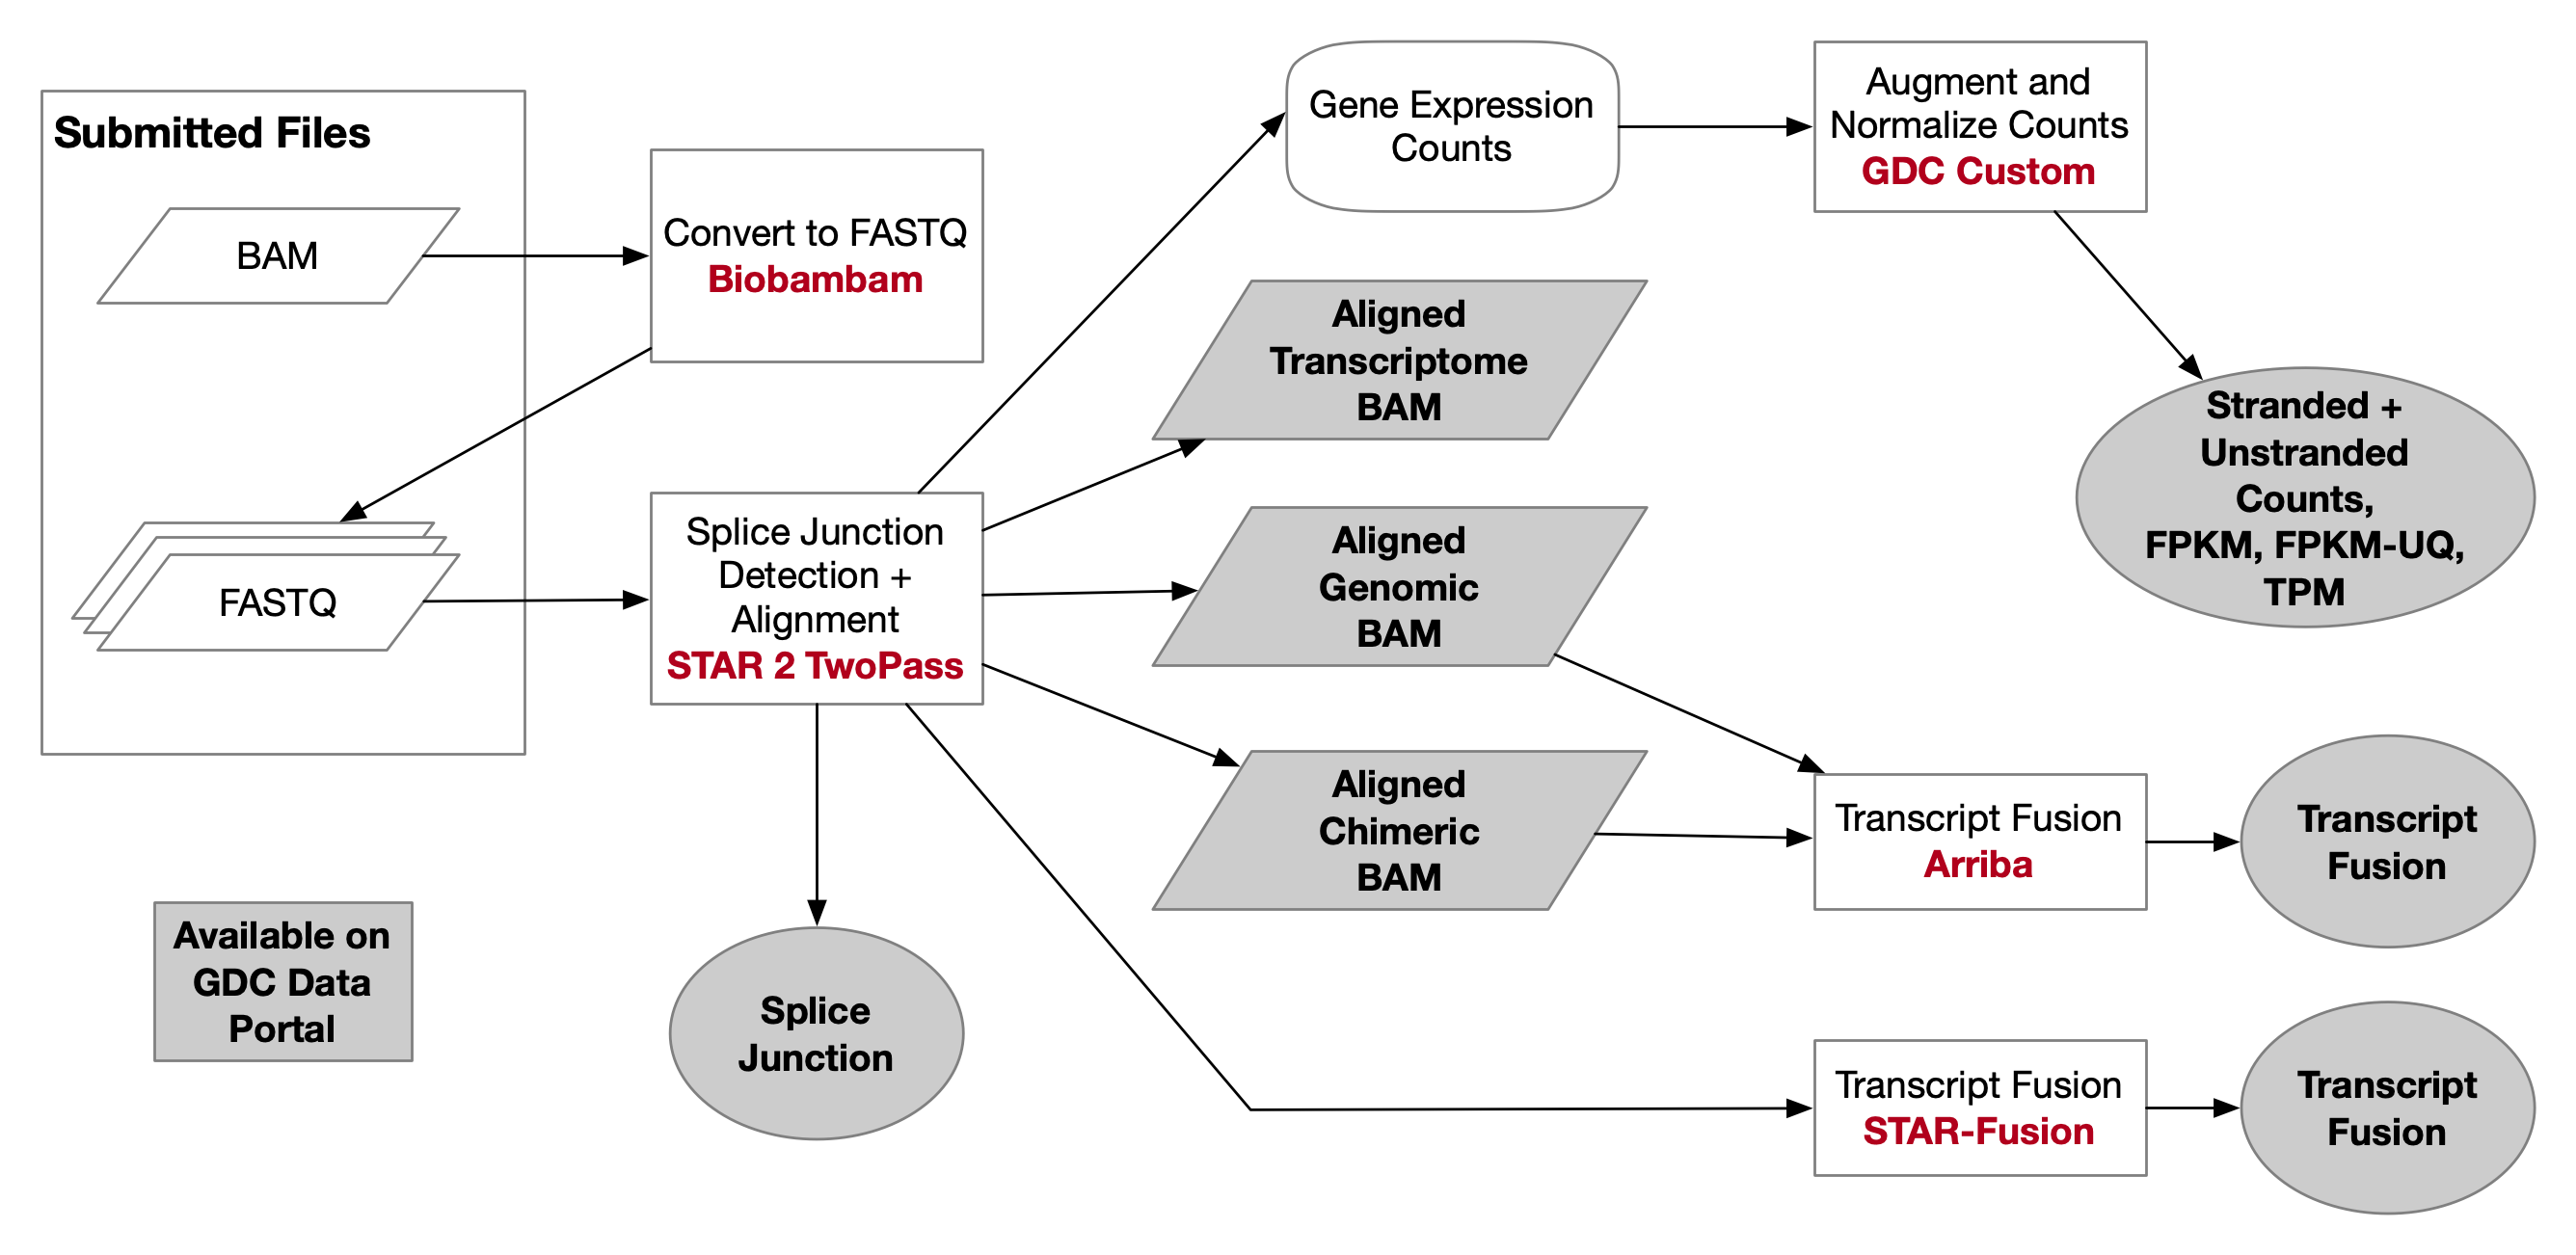
| unstranded | stranded_first |  stranded_second | tpm_unstranded | fpkm_unstranded | fpkm_uq_unstranded |

To deduce the hypoxia status, an algorithm of t-distributed Stochastic Neighbor Embedding (t-SNE) was applied [19]. t-SNE, a nonparametric, unsupervised method, can divide or condense patients into several distinct clusters, based on given signatures or hallmarks. The hallmark gene sets of hypoxia including 200 genes, were downloaded from the Molecular Signatures Database (MSigDB version 6.0). Further, expression changes of target genes involved in HIF-1 signaling pathway were analyzed between the hypoxiahigh and hypoxialow groups to explore their association with hypoxia. These targets were retrieved from the Kyoto Encyclopedia of Genes and Genomes (KEGG) database (https://www.kegg.jp/; ID:04066), including 15 genes involved in “Increase oxygen delivery” and 11 genes related to “Reduce oxygen consumption”. 
The limma algorithm was used to identify differentially expressed genes (DEGs) between the two groups [20]. Genes with a false discovery rate (FDR) adjusted p-value < 0.0001 and an absolute value of log2 (fold change) > 1 were considered as hypoxia-related DEGs.
limma algorithm
https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02366-0
https://academic.oup.com/bib/article/22/6/bbab173/6273240?login=true

The predefined gene sets included in our research were acquired from the Molecular Signatures Database (MSigDB; https://www.gsea-msigdb.org/gsea/msigdb/index.jsp) (44). We used the terms “lactic” and “hypoxia” as the search keywords in the MSigDB database.  After deleting duplicates, 284 LMRGs and 493 HRGs were identified for subsequent analysis [Table S2].
We analyzed differentially expressed genes (DEGs) using the R package “edgeR” in R (| log2 fold change [FC]|>1 and P < 0.05). We then identified differentially expressed LMRGs (DELMRGs) and HRGs (DEHRGs) by intersecting DEGs with LMRGs and HRGs
https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2022.998140/full

MSigDB
Weighted gene co-expression network analysis (WGCNA) was used to construct a scale-free co-expression network using the R package 'WGCNA' and to identify a gene module which is mostly correlated with hypoxia [38]. 
https://www.thno.org/v11p5061.htm